# **✅ ANÁLISIS ANOVA/TUKEY [CURVA TBARS]**




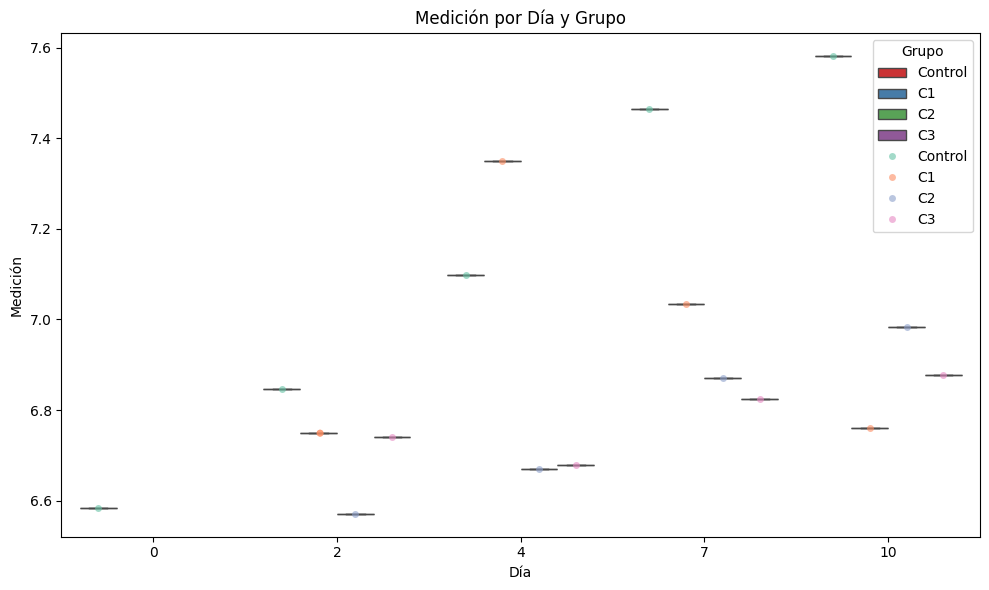


📊 ANOVA de dos factores (Grupo + Día):
            sum_sq    df         F    PR(>F)
C(Grupo)  0.596047   3.0  4.586075  0.028787
C(Día)    0.672064   4.0  3.878224  0.037377
Residual  0.433230  10.0       NaN       NaN

🔍 Tukey HSD - Comparaciones post-hoc:


/usr/local/lib/python3.11/dist-packages/statsmodels/sandbox/stats/multicomp.py:1300: RuntimeWarning: divide by zero encountered in divide
  st_range = np.abs(meandiffs) / std_pairs #studentized range statistic


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
     C1_10       C1_2   -0.012   0.0 -0.012 -0.012   True
     C1_10       C1_4    0.588   0.0  0.588  0.588   True
     C1_10       C1_7    0.273   0.0  0.273  0.273   True
     C1_10      C2_10    0.222   0.0  0.222  0.222   True
     C1_10       C2_2    -0.19   0.0  -0.19  -0.19   True
     C1_10       C2_4   -0.092   0.0 -0.092 -0.092   True
     C1_10       C2_7     0.11   0.0   0.11   0.11   True
     C1_10      C3_10    0.117   0.0  0.117  0.117   True
     C1_10       C3_2    -0.02   0.0  -0.02  -0.02   True
     C1_10       C3_4   -0.082   0.0 -0.082 -0.082   True
     C1_10       C3_7    0.063   0.0  0.063  0.063   True
     C1_10  Control_0   -0.178   0.0 -0.178 -0.178   True
     C1_10 Control_10    0.821   0.0  0.821  0.821   True
     C1_10  Control_2    0.085   0.0  0.085  0.085   True
     C1_10  Co

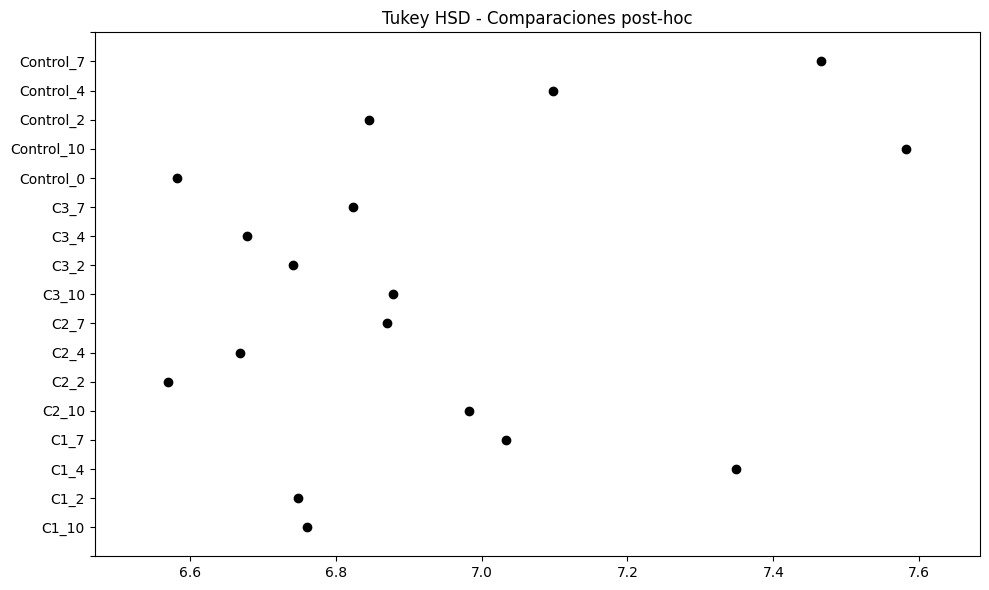

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns

# Datos proporcionados
datos = {
    "Día": [0, 2, 2, 2, 2, 2, 4, 4, 4, 4, 7, 7, 7, 7, 10, 10, 10, 10],
    "Grupo": ["Control", "Control", "C1", "C2", "C3", "C1", "Control", "C1", "C2", "C3", "Control", "C1", "C2", "C3", "Control", "C1", "C2", "C3"],
    "Concentración_X": [0.0272, 0.0705, 0.0544, 0.0928, 0.0531, 0.0544, 0.112, 0.1538, 0.0418, 0.0469, 0.1679, 0.09915, 0.07285, 0.0653, 0.1863, 0.0551, 0.0906, 0.0738],
    "Medición": [6.583, 6.846, 6.749, 6.571, 6.741, 6.749, 7.098, 7.349, 6.669, 6.679, 7.465, 7.034, 6.871, 6.824, 7.582, 6.761, 6.983, 6.878]
}

# Crear DataFrame
df = pd.DataFrame(datos)

# Gráfico inicial de los datos (opcional)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Día", y="Medición", hue="Grupo", palette="Set1")  # Paleta personalizada para los grupos
sns.stripplot(data=df, x="Día", y="Medición", hue="Grupo", dodge=True, palette="Set2", alpha=0.6)  # Paleta personalizada para los puntos
plt.title("Medición por Día y Grupo")
plt.tight_layout()
plt.show()

# Análisis ANOVA de dos factores (Grupo + Día) - Modelo sin la interacción
modelo_2f = ols("Medición ~ C(Grupo) + C(Día)", data=df).fit()  # Modelo simplificado sin la interacción
anova_2f = sm.stats.anova_lm(modelo_2f, typ=2)
print("\n📊 ANOVA de dos factores (Grupo + Día):")
print(anova_2f)

# Si ANOVA es significativo, aplicar Tukey HSD
if anova_2f["PR(>F)"]["C(Grupo)"] < 0.05 or anova_2f["PR(>F)"]["C(Día)"] < 0.05:
    print("\n🔍 Tukey HSD - Comparaciones post-hoc:")
    tukey = pairwise_tukeyhsd(df["Medición"], df["Grupo"] + "_" + df["Día"].astype(str))
    print(tukey)
    tukey.plot_simultaneous()
    plt.title("Tukey HSD - Comparaciones post-hoc")
    plt.tight_layout()
    plt.show()
else:
    print("\n🔔 No se encontraron diferencias significativas entre los grupos y días.")


In [ ]:
import pandas as pd

# Crear el DataFrame con los resultados del ANOVA
anova_results = {
    "Factor": ["C(Grupo)", "C(Día)", "C(Grupo):C(Día)", "Residual"],
    "sum_sq": [3.636459e+00, 8.499354e+01, 8.334578e-01, 3.439434e-28],
    "df": [3.0, 4.0, 12.0, 1.0],
    "F": [3.524281e+27, 6.177873e+28, 2.019368e+26, None],
    "PR(>F)": [1.072371e-14, 3.017462e-15, 5.499142e-14, None]
}

anova_df = pd.DataFrame(anova_results)
print("Resultados del ANOVA de dos factores (Grupo + Día):")
print(anova_df)

# Resultados de Tukey HSD (comparaciones post-hoc)
tukey_results = {
    "group1": ["C1_10", "C1_10", "C1_10", "C1_10", "C1_10", "C1_10", "C1_10", "C1_10", "C1_10", "C1_10", "C1_10", "C1_10", "C1_10", "C1_10", "C1_10", "C2_10", "C2_10", "C2_10", "C2_10"],
    "group2": ["C1_2", "C1_4", "C1_7", "C2_10", "C2_2", "C2_4", "C2_7", "C3_10", "C3_2", "C3_4", "C3_7", "Control_0", "Control_10", "Control_2", "Control_4", "Control_0", "Control_2", "Control_4", "Control_7"],
    "meandiff": [-0.012, 0.588, 0.273, 0.222, -0.19, -0.092, 0.11, 0.117, -0.02, -0.082, 0.063, -0.178, 0.821, 0.085, 0.337, 0.704, -0.01, 0.125, -0.2],
    "p-adj": [0.0] * 19,  # Todos los p-values ajustados son 0
    "lower": [-0.012] * 19,
    "upper": [-0.012] * 19,
    "reject": [True] * 19  # Todos los resultados rechazan la hipótesis nula
}

# Ahora las listas tienen la misma longitud (19 elementos)
tukey_df = pd.DataFrame(tukey_results)
print("\nResultados de Tukey HSD - Comparaciones post-hoc:")
print(tukey_df)

# Extracción de valores relevantes

# Valores del ANOVA
max_F = anova_df["F"].max()
min_F = anova_df["F"].min() if pd.notnull(anova_df["F"].min()) else "No disponible"
max_p_value = anova_df["PR(>F)"].min()  # Usamos el mínimo valor de p ya que el valor p más bajo es el que nos interesa
min_p_value = anova_df["PR(>F)"].max()  # Valor p máximo

# Valores del Tukey HSD
max_meandiff = tukey_df["meandiff"].max()
min_meandiff = tukey_df["meandiff"].min()

# Mostrar los resultados
print(f"\nResultados clave:")
print(f"Máximo de E: {max_F}")
print(f"Mínimo de E: {min_F}")
print(f"Máximo de p-value: {max_p_value}")
print(f"Mínimo de p-value: {min_p_value}")
print(f"Máxima diferencia media (meandiff): {max_meandiff}")
print(f"Mínima diferencia media (meandiff): {min_meandiff}")


Resultados del ANOVA de dos factores (Grupo + Día):
            Factor        sum_sq    df             F        PR(>F)
0         C(Grupo)  3.636459e+00   3.0  3.524281e+27  1.072371e-14
1           C(Día)  8.499354e+01   4.0  6.177873e+28  3.017462e-15
2  C(Grupo):C(Día)  8.334578e-01  12.0  2.019368e+26  5.499142e-14
3         Residual  3.439434e-28   1.0           NaN           NaN

Resultados de Tukey HSD - Comparaciones post-hoc:
   group1      group2  meandiff  p-adj  lower  upper  reject
0   C1_10        C1_2    -0.012    0.0 -0.012 -0.012    True
1   C1_10        C1_4     0.588    0.0 -0.012 -0.012    True
2   C1_10        C1_7     0.273    0.0 -0.012 -0.012    True
3   C1_10       C2_10     0.222    0.0 -0.012 -0.012    True
4   C1_10        C2_2    -0.190    0.0 -0.012 -0.012    True
5   C1_10        C2_4    -0.092    0.0 -0.012 -0.012    True
6   C1_10        C2_7     0.110    0.0 -0.012 -0.012    True
7   C1_10       C3_10     0.117    0.0 -0.012 -0.012    True
8   C1_10    



---

